In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
print len(df_train)
df_train.info()

891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Family

In [6]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


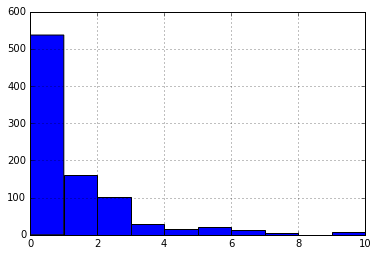

In [8]:
df_train['FamilySize'].hist()

In [9]:
df1 = df_train[df_train['Survived']==0]['FamilySize']
df2 = df_train[df_train['Survived']==1]['FamilySize']

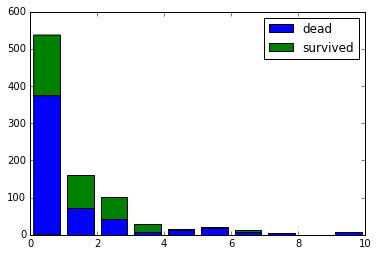

In [10]:
plt.hist([df1,df2],stacked=True)
plt.legend(['dead','survived'],loc=0)

## Sex

In [11]:
sex_unique = df_train['Sex'].unique()
sex_val = dict(zip(sex_unique, range(len(sex_unique))))
print sex_val
df_train['SexVal'] = df_train.Sex.map(sex_val)

{'male': 0, 'female': 1}


In [12]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexVal
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


SexVal      0    1
Survived          
0         468   81
1         109  233
SexVal           0         1
Survived                    
0         0.852459  0.147541
1         0.318713  0.681287


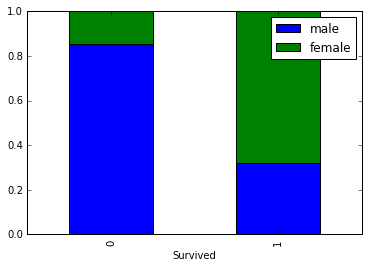

In [13]:
tab = pd.crosstab(df_train['Survived'], df_train['SexVal'])
print tab
pct = tab.div(tab.sum(axis=1).astype(float),axis=0)
print pct
pct.plot(kind='bar', stacked=True)
plt.legend(['male','female'],loc=0)

## Embarked

In [14]:
df_train.Embarked.unique()
mapVal = dict(zip(df_train.Embarked.unique(), range(len(df_train.Embarked.unique()))))
df_train['EmbarkedVal'] = df_train.Embarked.map(mapVal)

In [15]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexVal,EmbarkedVal
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0


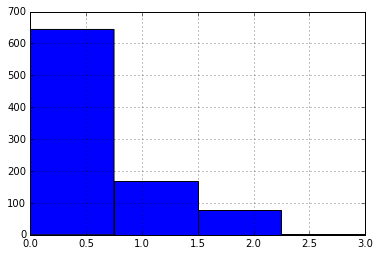

In [16]:
df_train.EmbarkedVal.hist(bins=len(df_train.EmbarkedVal.unique()))

In [17]:
df_train.EmbarkedVal.value_counts()

0    644
1    168
2     77
3      2
Name: EmbarkedVal, dtype: int64

In [18]:
df_train.EmbarkedVal[df_train.EmbarkedVal==3] = 0

/Users/andy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
df_train.EmbarkedVal.value_counts()

0    646
1    168
2     77
Name: EmbarkedVal, dtype: int64

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
FamilySize     891 non-null int64
SexVal         891 non-null int64
EmbarkedVal    891 non-null int64
dtypes: float64(2), int64(8), object(5)
memory usage: 104.5+ KB


## Fare

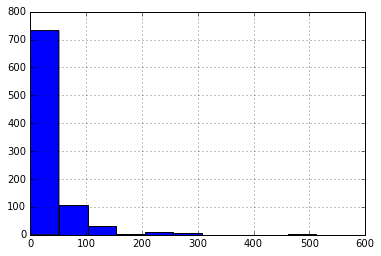

In [21]:
df_train.Fare.hist()

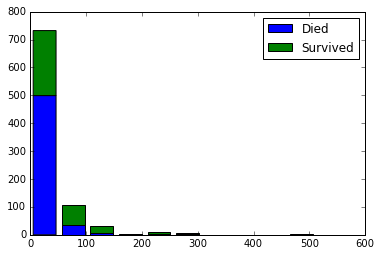

In [22]:
df1 = df_train[df_train['Survived'] == 0]['Fare']
df2 = df_train[df_train['Survived'] == 1]['Fare']
plt.hist([df1, df2], stacked=True)
plt.legend(('Died', 'Survived'), loc='best')

## Age

In [23]:
len(df_train.Age[df_train.Age.isnull()])

177

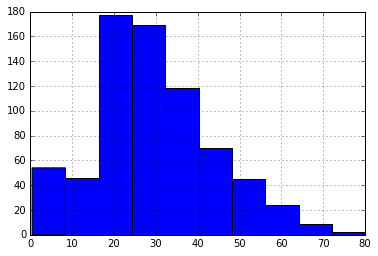

In [24]:
df_train.Age.hist()

In [25]:
df_train['AgeFill'] = df_train['Age']

In [26]:
df_train['AgeFill'] = df_train['AgeFill'] \
                        .groupby([df_train['SexVal'], df_train['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

In [27]:
len(df_train[df_train['AgeFill'].isnull()])

0

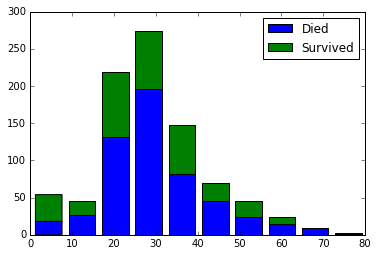

In [28]:
df1 = df_train[df_train['Survived'] == 0]['AgeFill']
df2 = df_train[df_train['Survived'] == 1]['AgeFill']
plt.hist([df1, df2], stacked=True)
plt.legend(('Died', 'Survived'), loc='best')

## Pclass

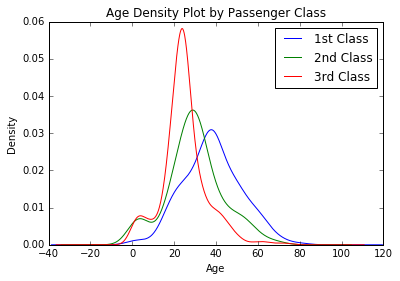

In [29]:
for pclass in sorted(df_train['Pclass'].unique()):
    df_train.AgeFill[df_train.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')

## clean data

In [30]:
df_train = df_train.drop(['Sex','Ticket','Name','Age', 'SibSp', 'Parch', 'PassengerId', 'Embarked', 'Cabin'], axis=1)
train_data = df_train.values
df_train.head()

,Survived,Pclass,Fare,FamilySize,SexVal,EmbarkedVal,AgeFill
0,0,3,7.2500,1,0,0,22.0
1,1,1,71.2833,1,1,1,38.0
2,1,3,7.9250,0,1,0,26.0
3,1,1,53.1000,1,1,0,35.0
4,0,3,8.0500,0,0,0,35.0


In [31]:
def cleanData(dataSet):
    data = dataSet.copy()
    # Family
    data['FamilySize'] = data['SibSp'] + data['Parch']
    # Sex
    sex_unique = data['Sex'].unique()
    sex_val = dict(zip(sex_unique, range(len(sex_unique))))
    data['SexVal'] = data.Sex.map(sex_val)
    #Embarked
    mapVal = dict(zip(data.Embarked.unique(), range(len(data.Embarked.unique()))))
    data['EmbarkedVal'] = data.Embarked.map(mapVal)
    data.EmbarkedVal[data.EmbarkedVal==3] = 0
    # Fare
    data.Fare[data.Fare.isnull()] = 0
    # Age
    data['AgeFill'] = data['Age']
    data['AgeFill'] = data['AgeFill'] \
                        .groupby([data['SexVal'], data['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))
            
    data = data.drop(['Sex','Ticket','Name','Age', 'SibSp', 'Parch', 'PassengerId', 'Embarked', 'Cabin'], axis=1)
    
    return data.values

In [32]:
df_test = pd.read_csv('test.csv')

In [33]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
test_data = cleanData(df_test)

/Users/andy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/andy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
print test_data.shape
print train_data.shape

(418, 6)
(891, 7)


In [36]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [37]:
train_data[1:]

array([[  1.    ,   1.    ,  71.2833, ...,   1.    ,   1.    ,  38.    ],
       [  1.    ,   3.    ,   7.925 , ...,   1.    ,   0.    ,  26.    ],
       [  1.    ,   1.    ,  53.1   , ...,   1.    ,   0.    ,  35.    ],
       ..., 
       [  0.    ,   3.    ,  23.45  , ...,   1.    ,   0.    ,  21.5   ],
       [  1.    ,   1.    ,  30.    , ...,   0.    ,   1.    ,  26.    ],
       [  0.    ,   3.    ,   7.75  , ...,   0.    ,   2.    ,  32.    ]])

In [38]:
train_features = train_data[:, 1:]
train_target = train_data[:, 0]
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 0.980920314254'

In [40]:
# Get the test data features, skipping the first column 'PassengerId'
test_x = test_data.copy()

# Predict the Survival values for the test data
test_y = clf.predict(test_x)

In [42]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

((891, 6), (891,))
((712, 6), (712,))
((179, 6), (179,))


In [44]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.86


In [48]:
model_score = clf.score(test_x, test_y)
print ("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print "Confusion Matrix" 
print confusion_matrix

Model Score 0.86 

Confusion Matrix
[[103   7]
 [ 18  51]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            predict_y, 
                            target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.85      0.94      0.89       110
    Survived       0.88      0.74      0.80        69

 avg / total       0.86      0.86      0.86       179

